In [82]:
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


QUESTION 3

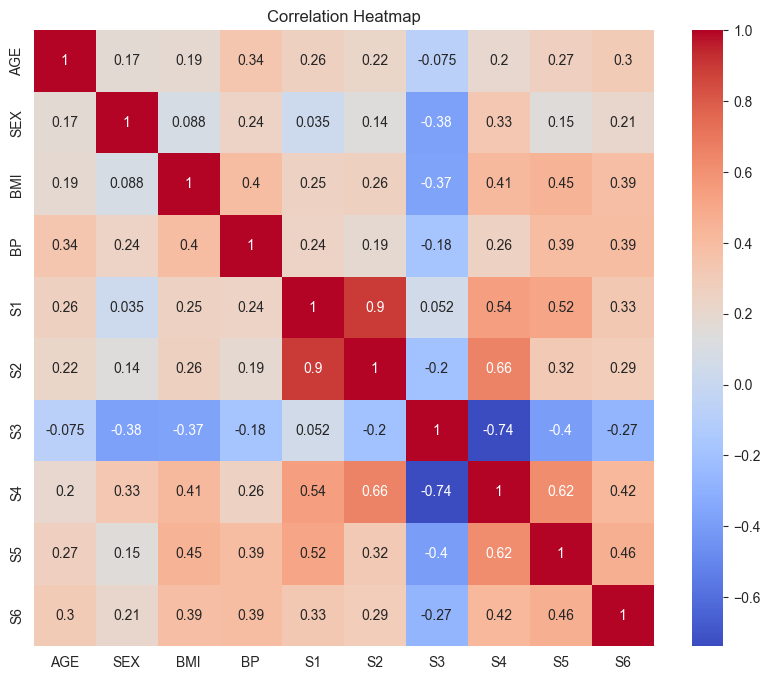

Mean Squared Error (MSE) for  model1: 2859.696348
R² Value for model2: 0.517748
  Variable         VIF
0      AGE   17.876909
1      SEX   12.192347
2      BMI   55.155355
3       BP   69.404363
4       S1  576.886424
5       S2  244.913298
6       S3   52.293365
7       S4   81.350054
8       S5  277.183350
9       S6   93.976986
Selected Features:  ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
Mean Squared Error (MSE) for the final model: 2876.683252
R² Value for the final model: 0.514884


In [83]:

data = pd.read_excel('diabetes_Data.xlsx')

# Select the columns for features and the target variable
features = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
X = data[features]  
y = data['Y']  

# Calculate the correlation matrix of the 10 features
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Create and fit a linear regression model using all features
model1 = LinearRegression()
model1.fit(X, y)

# Predict with the full model
y_pred_full = model1.predict(X)

# Calculate and print R2 score and Mean Squared Error for the full model
r2_model1 = r2_score(y, y_pred_full)
mse_model1 = mean_squared_error(y, y_pred_full)
print(f"Mean Squared Error (MSE) for  model1: {mse_model1:.6f}")
print(f"R² Value for model2: {r2_model1:.6f}")

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF values
print(vif)

# Define a function for forward stepwise selection
def forward_stepwise_selection(X, y, alpha=0.05):
    selected_vars = []
    remaining_vars = list(X.columns)
    while len(remaining_vars) > 0:
        p_values = []
        for var in remaining_vars:
            model = sm.OLS(y, sm.add_constant(X[selected_vars + [var]]))
            model_fit = model.fit()
            p_value = model_fit.pvalues[var]
            p_values.append((var, p_value))
        best_var, min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value < alpha:
            selected_vars.append(best_var)
            remaining_vars.remove(best_var)
        else:
            break
    return selected_vars

# Perform forward stepwise selection and get the selected features
selected_features = forward_stepwise_selection(X, y)

print("Selected Features: ", selected_features)

# Create and fit a linear regression model with selected features
model_selected_features = LinearRegression()
model_selected_features.fit(X[selected_features], y)

# Predict with the model using selected features
y_pred_selected_features = model_selected_features.predict(X[selected_features])

# Calculate and print R2 score and Mean Squared Error for the model with selected features
r2 = r2_score(y, y_pred_selected_features)
mse = mean_squared_error(y, y_pred_selected_features)
print(f"Mean Squared Error (MSE) for the final model: {mse:.6f}")
print(f"R² Value for the final model: {r2:.6f}")


QUESTION 4

Probability of Survival for a Passenger: 38.20%
    Pclass     Sex       Age  Survival Probability
0        1  female   (0, 18]              0.923077
1        1  female  (18, 30]              0.972222
2        1  female  (30, 50]              0.964912
3        1  female  (50, 80]              0.962963
4        1    male   (0, 18]              0.750000
5        1    male  (18, 30]              0.375000
6        1    male  (30, 50]              0.364865
7        1    male  (50, 80]              0.216216
8        2  female   (0, 18]              0.952381
9        2  female  (18, 30]              0.869565
10       2  female  (30, 50]              0.937500
11       2  female  (50, 80]              0.500000
12       2    male   (0, 18]              0.523810
13       2    male  (18, 30]              0.102941
14       2    male  (30, 50]              0.075472
15       2    male  (50, 80]              0.062500
16       3  female   (0, 18]              0.534483
17       3  female  (18, 30]      

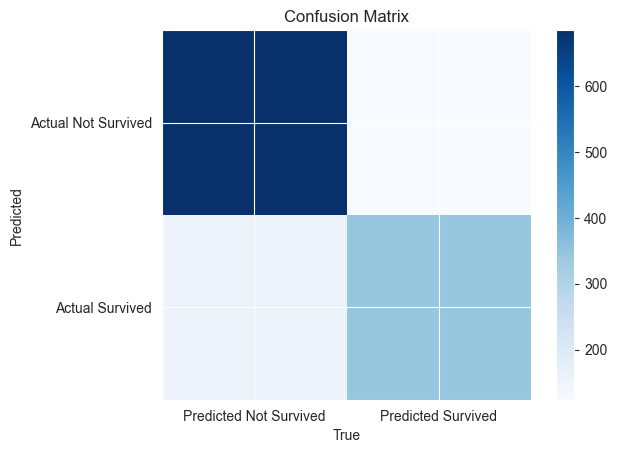

In [69]:
# Suppress all warnings
warnings.filterwarnings("ignore")
# 4.2 Load Titanic Dataset and Calculate Probability of Survival

# Load Titanic dataset from CSV file
titanic_df = pd.read_csv('titanic3.csv')

# Calculate the probability of survival for a passenger
total_passengers = len(titanic_df)
survival_count = titanic_df['survived'].sum()
survival_probability = survival_count / total_passengers
print(f"Probability of Survival for a Passenger: {survival_probability:.2%}")

# 4.3 Survival Probabilities by Passenger Class, Gender, and Age

# Define age intervals
age_intervals = pd.cut(titanic_df['age'], [0, 18, 30, 50, 80])

# Group data by passenger class, sex, and age intervals
survival_table = titanic_df.groupby(['pclass', 'sex', age_intervals], observed=False)['survived'].mean()

# Convert the grouped series to a DataFrame and reset the index
survival_table = survival_table.reset_index()

# Rename columns for better readability
survival_table.columns = ['Pclass', 'Sex', 'Age', 'Survival Probability']

# Print the formatted survival table
print(survival_table)

# 4.4 Build Logistic Regression Model for Survival Rates

# Prepare the data
X = titanic_df[['pclass', 'sex', 'age']]
y = titanic_df['survived']

# Replace missing age values with the mean age

X['age'].fillna(X['age'].mean(), inplace=True)

# Convert categorical variable 'sex' to binary (0 or 1)
X['sex'] = X['sex'].map({'female': 0, 'male': 1})

# Add a constant (intercept) term to the independent variables
X = sm.add_constant(X)
 
# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()
# 
#  Get parameter estimates and p-values
parameter_estimates = result.params
p_values = result.pvalues
# 
 
#  Summary of the logistic regression model
print(result.summary())

# 4.5 Performance Evaluation of the Model

# Predict the test set
y_pred = result.predict(X)

# Define a threshold to classify as survived or not survived
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred_class)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_class)
print("Confusion Matrix:")
print(cm)
print(f"Classification Accuracy: {accuracy:.2%}")

# Visualization of the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], labels=['Predicted Not Survived', 'Predicted Survived'])
plt.yticks([0, 1], labels=['Actual Not Survived', 'Actual Survived'])
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()
